### Our Mission

In this lesson you gained some insight into a number of techniques used to understand how well our model is performing.  This notebook is aimed at giving you some practice with the metrics specifically related to classification problems.  With that in mind, we will again be looking at the spam dataset from the earlier lessons.

First, run the cell below to prepare the data and instantiate a number of different models.

In [1]:
# Import our libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import tests as t

# Read in our dataset
df = pd.read_table('smsspamcollection/SMSSpamCollection',
                   sep='\t', 
                   header=None, 
                   names=['label', 'sms_message'])

# Fix our response value
df['label'] = df.label.map({'ham':0, 'spam':1})

# Split our dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    random_state=1)

# Instantiate the CountVectorizer method
count_vector = CountVectorizer()

# Fit the training data and then return the matrix
training_data = count_vector.fit_transform(X_train)

# Transform testing data and return the matrix. Note we are not fitting the testing data into the CountVectorizer()
testing_data = count_vector.transform(X_test)

# Instantiate a number of our models
naive_bayes = MultinomialNB()
bag_mod = BaggingClassifier(n_estimators=200)
rf_mod = RandomForestClassifier(n_estimators=200)
ada_mod = AdaBoostClassifier(n_estimators=300, learning_rate=0.2)
svm_mod = SVC()

> **Step 1**: Now, fit each of the above models to the appropriate data.  Answer the following question to assure that you fit the models correctly.

In [2]:
# Fit each of the 4 models
# This might take some time to run

naive_bayes.fit(training_data,y_train)
bag_mod.fit(training_data,y_train)
rf_mod.fit(training_data,y_train)
ada_mod.fit(training_data,y_train)
svm_mod.fit(training_data,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [3]:
# The models you fit above were fit on which data?

a = 'X_train'
b = 'X_test'
c = 'y_train'
d = 'y_test'
e = 'training_data'
f = 'testing_data'

# Change models_fit_on to only contain the correct string names
# of values that you oassed to the above models

models_fit_on = {c, e} # update this to only contain correct letters

# Checks your solution - don't change this
t.test_one(models_fit_on)

That's right!  You need to fit on both parts of the data pertaining to training data!


> **Step 2**: Now make predictions for each of your models on the data that will allow you to understand how well our model will extend to new data.  Then correctly add the strings to the set in the following cell.

In [4]:
# Make predictions using each of your models
preds_nb=naive_bayes.predict(testing_data)
preds_bag=bag_mod.predict(testing_data)
preds_rf=rf_mod.predict(testing_data)
preds_ada=ada_mod.predict(testing_data)
preds_svm=svm_mod.predict(testing_data)

In [5]:
# Which data was used in the predict method to see how well your
# model would work on new data?

a = 'X_train'
b = 'X_test'
c = 'y_train'
d = 'y_test'
e = 'training_data'
f = 'testing_data'

# Change models_predict_on to only contain the correct string names
# of values that you oassed to the above models

models_predict_on = {f} # update this to only contain correct letters

# Checks your solution - don't change this
t.test_two(models_predict_on)

That's right! To see how well our models perform in a new setting, you will want to predict on the test set of data.


Now that you have set up all your predictions, let's get to topis addressed in this lesson - measuring how well each of your models performed. First, we will focus on how each metric was calculated for a single model, and then in the final part of this notebook, you will choose models that are best based on a particular metric.

You will be writing functions to calculate a number of metrics and then comparing the values to what you get from sklearn.  This will help you build intuition for how each metric is calculated.

> **Step 3**: As an example of how this will work for the upcoming questions, run the cell below.  Fill in the below function to calculate accuracy, and then compare your answer to the built in to assure you are correct.

In [6]:
# accuracy is the total correct divided by the total to predict
def accuracy(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the accuracy as a float
    '''
    return np.sum(preds == actual)/len(actual)


print(accuracy(y_test, preds_nb))
print(accuracy_score(y_test, preds_nb))
print("Since these match, we correctly calculated our metric!")

0.988513998564
0.988513998564
Since these match, we correctly calculated our metric!


> **Step 4**: Fill in the below function to calculate precision, and then compare your answer to the built in to assure you are correct.

In [7]:
# precision is the true positives over the predicted positive values
def precision(actual, preds):
    '''
    INPUT
    (assumes positive = 1 and negative = 0)
    preds - predictions as a numpy array or pandas series 
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the precision as a float
    
    '''
    return np.sum(preds [preds==1] == actual[preds==1])/len(preds[preds==1])
    



print(precision(y_test, preds_nb))
print(precision_score(y_test, preds_nb))
print("If the above match, you got it!")

0.972067039106
0.972067039106
If the above match, you got it!


> **Step 5**: Fill in the below function to calculate recall, and then compare your answer to the built in to assure you are correct.

In [8]:
# recall is true positives over all actual positive values
def recall(actual, preds):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the recall as a float
    '''

    return np.sum(preds [actual==1] == actual[actual==1])/len(actual[actual==1])


print(recall(y_test, preds_nb))
print(recall_score(y_test, preds_nb))
print("If the above match, you got it!")

0.940540540541
0.940540540541
If the above match, you got it!


> **Step 6**: Fill in the below function to calculate f1-score, and then compare your answer to the built in to assure you are correct.

In [9]:
# f1_score is 2*(precision*recall)/(precision+recall))
def f1(preds, actual):
    '''
    INPUT
    preds - predictions as a numpy array or pandas series
    actual - actual values as a numpy array or pandas series
    
    OUTPUT:
    returns the f1score as a float
    '''
    
    return 2.0*recall(preds, actual)*precision(preds, actual)/(recall(preds, actual)+precision(preds, actual))


print(f1(y_test, preds_nb))
print(f1_score(y_test, preds_nb))
print("If the above match, you got it!")

0.956043956044
0.956043956044
If the above match, you got it!


> **Step 7:** Now that you have calculated a number of different metrics, let's tie that to when we might use one versus another.  Use the dictionary below to match a metric to each statement that identifies when you would want to use that metric.

In [10]:
# add the letter of the most appropriate metric to each statement
# in the dictionary
a = "recall"
b = "precision"
c = "accuracy"
d = 'f1-score'


seven_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': c,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a,    
'When we identify something as positive, we want to be sure it is truly positive': b, 
'We care equally about identifying positive and negative cases': d    
}

t.sol_seven(seven_sol)

That's right!  It isn't really necessary to memorize these in practice, but it is important to know they exist and know why might use one metric over another for a particular situation.


> **Step 8:** Given what you know about the metrics now, use this information to correctly match the appropriate model to when it would be best to use each in the dictionary below.

In [11]:
print('NB')
print(accuracy_score(y_test, preds_nb))
print(precision_score(y_test, preds_nb))
print(recall_score(y_test, preds_nb))
print(f1_score(y_test, preds_nb))

print('bag')
print(accuracy_score(y_test, preds_bag))
print(precision_score(y_test, preds_bag))
print(recall_score(y_test, preds_bag))
print(f1_score(y_test, preds_bag))

print('random forest')
print(accuracy_score(y_test, preds_rf))
print(precision_score(y_test, preds_rf))
print(recall_score(y_test, preds_rf))
print(f1_score(y_test, preds_rf))

print('Ada')
print(accuracy_score(y_test, preds_ada))
print(precision_score(y_test, preds_ada))
print(recall_score(y_test, preds_ada))
print(f1_score(y_test, preds_ada))
print('svm')
print(accuracy_score(y_test, preds_svm))
print(precision_score(y_test, preds_svm))
print(recall_score(y_test, preds_svm))
print(f1_score(y_test, preds_svm))

NB
0.988513998564
0.972067039106
0.940540540541
0.956043956044
bag
0.974874371859
0.912087912088
0.897297297297
0.904632152589
random forest
0.983488872936
1.0
0.875675675676
0.933717579251
Ada
0.977027997128
0.969325153374
0.854054054054
0.908045977011
svm
0.867193108399
0.0
0.0
0.0


/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/conda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [12]:
# use the answers you found to the previous questiona, then match the model that did best for each metric
a = "naive-bayes"
b = "bagging"
c = "random-forest"
d = 'ada-boost'
e = "svm"


eight_sol = {
'We have imbalanced classes, which metric do we definitely not want to use?': a,
'We really want to make sure the positive cases are all caught even if that means we identify some negatives as positives': a,    
'When we identify something as positive, we want to be sure it is truly positive': c, 
'We care equally about identifying positive and negative cases': a  
}

t.sol_eight(eight_sol)

That's right!  Naive Bayes was the best model for all of our metrics except precision!


In [13]:
# cells for work

In [14]:
# If you get stuck, also notice there is a solution available by hitting the orange button in the top left

As a final step in this workbook, let's take a look at the last three metrics you saw, f-beta scores, ROC curves, and AUC.

**For f-beta scores:** If you decide that you care more about precision, you should move beta closer to 0.  If you decide you care more about recall, you should move beta towards infinity. 

> **Step 9:** Using the fbeta_score works similar to most of the other metrics in sklearn, but you also need to set beta as your weighting between precision and recall.  Use the space below to show that you can use [fbeta in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.fbeta_score.html) to replicate your f1-score from above.  If in the future you want to use a different weighting, [this article](http://mlwiki.org/index.php/Precision_and_Recall) does an amazing job of explaining how you might adjust beta for different situations.

In [15]:
# import fbeta_score
from sklearn.metrics import fbeta_score

# Show that you can produce the same f1_score results using fbeta_score
print(fbeta_score(y_test, preds_bag,1.0))   #f_belta for \beta=1 == f1_sore
print(f1_score(y_test, preds_bag))

0.904632152589
0.904632152589


> **Step 10:** Building ROC curves in python is a pretty involved process on your own.  I wrote the function below to assist with the process and make it easier for you to do so in the future as well.  Try it out using one of the other classifiers you created above to see how it compares to the random forest model below.

Run the cell below to build a ROC curve, and retrieve the AUC for the random forest model.

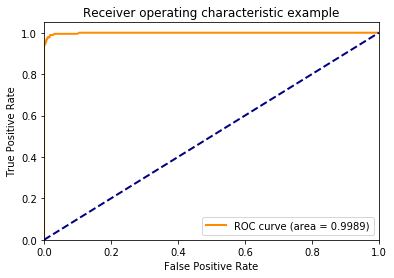

0.937837837838


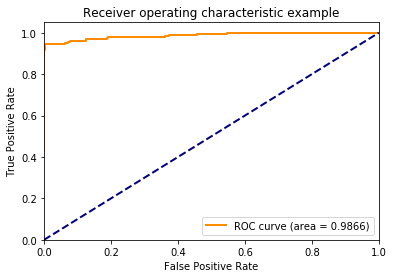

0.968200733846


In [24]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(y_test)):
        fpr[i], tpr[i], _ = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc_score(y_test, np.round(y_preds[:, 1]))      #if use round of y_pred for score will be different than the under curve area
    
    
    
# Finding roc and auc for the random forest model    
print(build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test))
print(build_roc_auc(naive_bayes, training_data, testing_data, y_train, y_test))

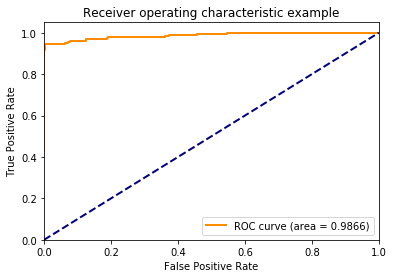

0.968200733846


In [23]:
print(build_roc_auc(naive_bayes, training_data, testing_data, y_train, y_test))

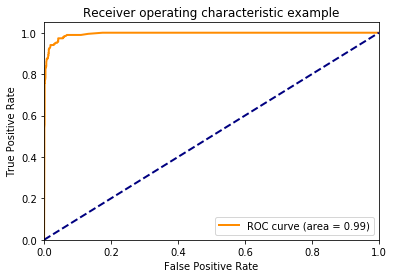

0.942026132092


In [21]:
# Your turn here - choose another classifier to see how it compares

print(build_roc_auc(bag_mod, training_data, testing_data, y_train, y_test))


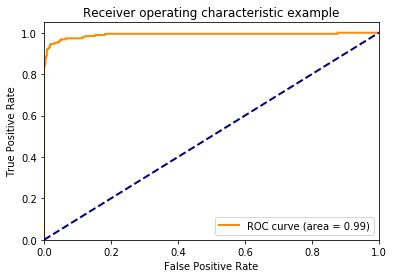

0.924957490603


In [49]:

print(build_roc_auc(ada_mod, training_data, testing_data, y_train, y_test))

[ 1.     0.985  0.98   0.975  0.97   0.965  0.96   0.955  0.95   0.945
  0.94   0.935  0.93   0.925  0.92   0.915  0.91   0.905  0.9    0.895
  0.88   0.875  0.865  0.86   0.855  0.845  0.84   0.835  0.82   0.81
  0.805  0.795  0.79   0.78   0.765  0.76   0.755  0.735  0.725  0.72
  0.715  0.685  0.68   0.665  0.63   0.625  0.6    0.595  0.57   0.565
  0.555  0.55   0.525  0.515  0.51   0.47   0.4    0.37   0.36   0.34
  0.325  0.29   0.28   0.26   0.255  0.25   0.245  0.23   0.215  0.205  0.2
  0.195  0.19   0.185  0.175  0.17   0.165  0.16   0.155  0.15   0.13
  0.125  0.12   0.115  0.11   0.105  0.095  0.09   0.085  0.08   0.075
  0.07   0.065  0.06   0.055  0.05   0.045  0.04   0.035  0.03   0.025
  0.02   0.015  0.01   0.005  0.   ]
[  0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.000000

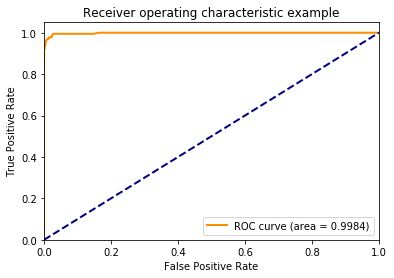

0.998440576338


In [46]:
# Function for calculating auc and roc

def build_roc_auc(model, X_train, X_test, y_train, y_test):
    '''
    INPUT:
    model - an sklearn instantiated model
    X_train - the training data
    y_train - the training response values (must be categorical)
    X_test - the test data
    y_test - the test response values (must be categorical)
    OUTPUT:
    auc - returns auc as a float
    prints the roc curve
    '''
    import numpy as np
    import matplotlib.pyplot as plt
    from itertools import cycle
    from sklearn.metrics import roc_curve, auc, roc_auc_score
    from scipy import interp
    
    y_preds = model.fit(X_train, y_train).predict_proba(X_test)
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    thresh=[]
    fpr_=[]
    tpr_=[]
    for i in range(len(y_test)):           #this loop seems to be redundant here, not generating anything new, meant for classes
        fpr[i], tpr[i], t = roc_curve(y_test, y_preds[:, 1])
        roc_auc[i] = auc(fpr[i], tpr[i])
        thresh.append(t)
        fpr_.append(fpr[i])
        tpr_.append(tpr[i])
    print(thresh[0])
    print(fpr_[0])
    print(tpr_[0])
#    print('---')
#    print(thresh[1])
#    print(fpr_[1])
#    print(tpr_[1])
#    print('---')
#    print(thresh[2])
#    print(fpr_[2])
#    print(tpr_[2])
    print('---')
    print(thresh[100]-thresh[890])   #for every i, these are the same, redundant
    print(fpr_[100]-fpr_[890])
    print(tpr_[100]-tpr_[890])    
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_preds[:, 1].ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    
    plt.plot(fpr[2], tpr[2], color='darkorange',
             lw=2, label='ROC curve (area = %0.4f)' % roc_auc[2])
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()
    
    return roc_auc_score(y_test, y_preds[:, 1])         #if use predict_proba for score will be similar to under curve area
    
    
# Finding roc and auc for the random forest model    
print(build_roc_auc(rf_mod, training_data, testing_data, y_train, y_test))
#print(build_roc_auc(naive_bayes, training_data, testing_data, y_train, y_test))

In [33]:
from sklearn.metrics import confusion_matrix

print('random forest')
print('Accuracy;',accuracy_score(y_test, preds_rf))
print('Precision:',precision_score(y_test, preds_rf))
print('Recall:',recall_score(y_test, preds_rf))
print('F1:',f1_score(y_test, preds_rf))
print('Confusion:\n',confusion_matrix(y_test, preds_rf))

print('')
print('NB')
print('Accuracy:',accuracy_score(y_test, preds_nb))
print('Precision:',precision_score(y_test, preds_nb))
print('Recall:',recall_score(y_test, preds_nb))
print('F1:',f1_score(y_test, preds_nb))
print('Confusion:\n',confusion_matrix(y_test, preds_nb))   #positive class is the spam at 162 R_F/174  N_B

random forest
Accuracy; 0.983488872936
Precision: 1.0
Recall: 0.875675675676
F1: 0.933717579251
Confusion:
 [[1208    0]
 [  23  162]]

NB
Accuracy: 0.988513998564
Precision: 0.972067039106
Recall: 0.940540540541
F1: 0.956043956044
Confusion:
 [[1203    5]
 [  11  174]]


In [31]:
y2=naive_bayes.predict_proba(testing_data)
y1=naive_bayes.predict(testing_data)
list(zip(y_test,y1,y2))

[(0, 0, array([ 0.99712255,  0.00287745])),
 (0, 0, array([  9.99981651e-01,   1.83488846e-05])),
 (0, 0, array([ 0.99792699,  0.00207301])),
 (0, 0, array([ 0.97998019,  0.02001981])),
 (0, 0, array([  1.00000000e+00,   1.34709013e-11])),
 (0, 0, array([  1.00000000e+00,   1.56340395e-10])),
 (0, 0, array([ 0.99807383,  0.00192617])),
 (0, 0, array([  9.99049053e-01,   9.50947496e-04])),
 (0, 0, array([  9.99961584e-01,   3.84158042e-05])),
 (0, 0, array([  9.99999987e-01,   1.30241278e-08])),
 (0, 0, array([  9.99997866e-01,   2.13391405e-06])),
 (0, 0, array([ 0.99122036,  0.00877964])),
 (0, 0, array([  9.99549836e-01,   4.50164102e-04])),
 (0, 0, array([  9.99806644e-01,   1.93355944e-04])),
 (0, 0, array([  9.99995794e-01,   4.20562786e-06])),
 (0, 0, array([  9.99988173e-01,   1.18270971e-05])),
 (1, 1, array([  2.97643548e-07,   9.99999702e-01])),
 (0, 0, array([  9.99956836e-01,   4.31642834e-05])),
 (1, 1, array([  1.20067246e-21,   1.00000000e+00])),
 (0, 0, array([  9.99812

In [42]:
np.shape(y2)

(1393, 2)